In [5]:
import numpy as np
from matplotlib import pyplot as plt

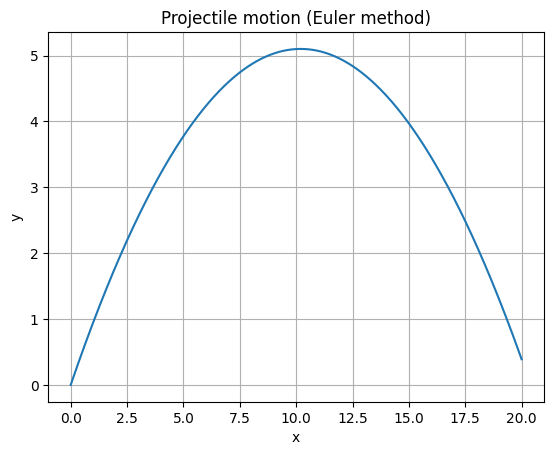

In [17]:
#Euler
#lets take 2s
#Initial velocities of vx0 = 5m/s and v y0 = 5m/s
T = 2
N = 2000
dt = T/N

x = np.zeros(N+1)
y = np.zeros(N+1)
vx = np.zeros(N+1)
vy = np.zeros(N+1)

x[0] = 0
y[0] = 0
vx[0] = 10
vy[0] = 10

for n in range(N):

    x[n+1] = x[n] + vx[n]*dt
    y[n+1]  = y[n] + vy[n]*dt
    vx[n+1] = vx[n] 
    vy[n+1] = vy[n] - g*dt

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile motion (Euler method)")
plt.grid(True)
plt.show()

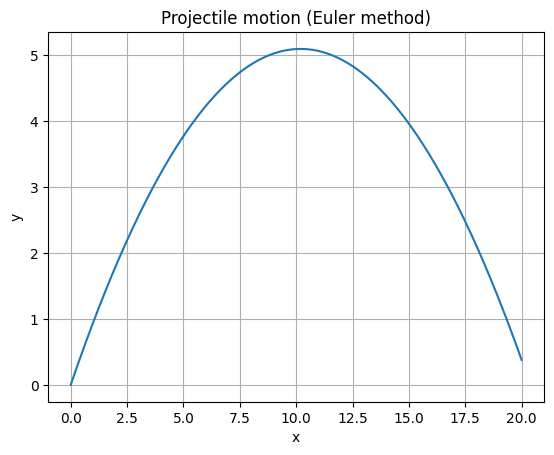

In [18]:
#finite differewnce method with the same values
#lets take 2s
#Initial velocities of vx0 = 5m/s and v y0 = 5m/s
T = 2
N = 2000
dt = T/N

x = np.zeros(N+1)
y = np.zeros(N+1)
vx = np.zeros(N+1)
vy = np.zeros(N+1)

x[0] = 0
y[0] = 0
vx[0] = 10
vy[0] = 10

x[1] = x[0] + vx[0]*dt
y[1] = y[0] +vy[0]*dt - 0.5*g*dt**2

for n in range(1,N):

    x[n+1] = 2*x[n] - x[n-1]
    y[n+1]  = 2*y[n] - y[n-1] - g*dt**2

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile motion (Euler method)")
plt.grid(True)
plt.show()

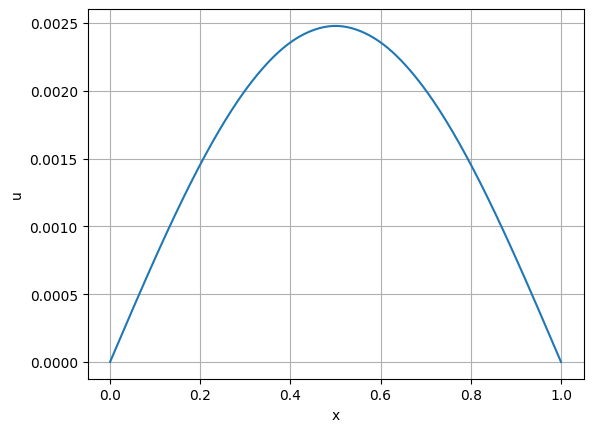

In [19]:
#Using crank nicolson method to solve the diffusion equation with the conditions of reflective/absorbing walls

L = 1.0
N = 200
D = 1.0
dx = L / N
dt = 0.01
alpha = D*dt/dx**2
steps = 50

x = np.linspace(0, L, N+1)


u = np.exp(-(x - L/2)**2 / 0.01)


A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))

for i in range(N-1):
    A[i,i] = 1 + alpha
    B[i,i] = 1 - alpha
    if i > 0:
        A[i,i-1] = -alpha/2
        B[i,i-1] =  alpha/2
    if i < N-2:
        A[i,i+1] = -alpha/2
        B[i,i+1] =  alpha/2


for s in range(steps):
    u_inner = np.linalg.solve(A, B @ u[1:-1])
    u[1:-1] = u_inner
    u[0] = 0.0
    u[-1] = 0.0


plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()





Problem Statement

An incompressible Newtonian fluid is confined between two infinite, parallel, horizontal plates separated by a distance H. The flow is initially at rest.
At time 𝑡 = 0, the top plate located at 𝑦=𝐻 is suddenly set into motion with a constant velocity 𝑈 in the 𝑥-direction, while the bottom plate at 𝑦 = 0 remains stationary. There is no imposed pressure gradient, and gravity effects are neglected.

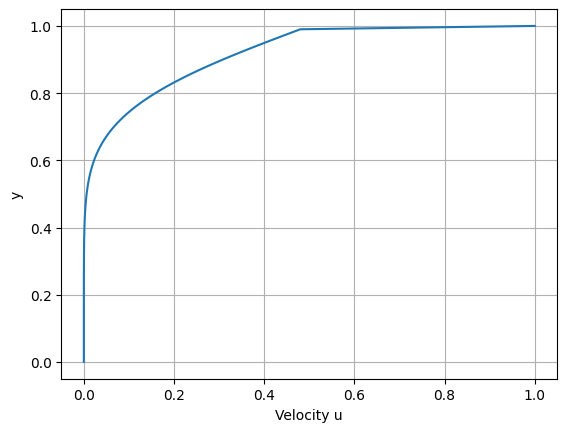

In [20]:

H = 1.0
U = 1.0
nu = 0.01
N = 100
T = 2.0
dt = 0.01

dy = H / N
alpha = nu * dt / dy**2
steps = int(T / dt)

y = np.linspace(0, H, N+1)


u = np.zeros(N+1)


A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))

for i in range(N-1):
    A[i,i] = 1 + alpha
    B[i,i] = 1 - alpha
    if i > 0:
        A[i,i-1] = -alpha/2
        B[i,i-1] =  alpha/2
    if i < N-2:
        A[i,i+1] = -alpha/2
        B[i,i+1] =  alpha/2


for s in range(steps):
    rhs = B @ u[1:-1]
    rhs[-1] += (alpha/2) * U   
    u[1:-1] = np.linalg.solve(A, rhs)

    
    u[0]  = 0.0
    u[-1] = U


plt.plot(u, y)
plt.xlabel("Velocity u")
plt.ylabel("y")
plt.grid(True)
plt.show()
